In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import gzip
import tensorflow as tf
import glob
import math
import skimage
from matplotlib.patches import Rectangle
import json

In [2]:
tf.enable_eager_execution()

In [3]:
from softlearning.replay_pools.utils import get_replay_pool_from_variant

def get_grid_vals(env, n_samples):
    n_samples = 50
    obs_space = env.observation_space['state_observation']
    xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
    ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)
    xys = np.meshgrid(xs, ys)
    return np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2)), xys

def get_replay_pool(checkpoint, checkpoint_dir):
    from softlearning.replay_pools.utils import get_replay_pool_from_variant

    variant = checkpoint['variant']
    train_env = checkpoint['training_environment']
    replay_pool = get_replay_pool_from_variant(variant, train_env)

    replay_pool_path = os.path.join(checkpoint_dir, 'replay_pool.pkl')
    replay_pool.load_experience(replay_pool_path)
    return replay_pool

def plot_trajectories(checkpoint, checkpoint_dir, num_trajectories=10):
    replay_pool = get_replay_pool(checkpoint, checkpoint_dir)
    trajectories = replay_pool.last_n_batch(100 * num_trajectories)['observations']['state_observation'] \
                    .reshape(num_trajectories, 100, -1)
    for i in range(num_trajectories):
        plt.plot(trajectories[i,:,0], trajectories[i,:,1], color='w', linewidth=1)

## Specify the Experiment Directory

In [4]:
common_dir = '/home/kevinli/ray_results'
universe = 'gym'
domain = 'Point2D'
task = 'Maze-v0'

In [5]:
checkpoint_to_analyze = 500

base_path = os.path.join(common_dir, universe, domain, task)
exps = sorted(list(glob.iglob(os.path.join(base_path, '*'))))
for i, exp in enumerate(exps):
    print(f'{i} \t {exp.replace(base_path, "")}')
    
exp_choice = int(input('\n Which experiment do you want to analyze? (ENTER A NUMBER) \t'))

exp_path = exps[exp_choice]
print('\n')
seeds = sorted(list(glob.iglob(os.path.join(exp_path, '*'))))
seeds = [seed for seed in seeds if os.path.isdir(seed)]
checkpoints = []
for i, seed in enumerate(seeds):
#     print(f'{i} \t {seed.replace(exp_path, "")}')
    checkpoint_dir = os.path.join(seed, f'checkpoint_{checkpoint_to_analyze}')
    try:
        with open(os.path.join(seed, f'{checkpoint_dir}/checkpoint.pkl'), 'rb') as f:
            checkpoint = pickle.load(f)
            checkpoints.append([checkpoint, checkpoint_dir])
    except:
        pass
    
print(f"Loaded {len(checkpoints)} seeds")

0 	 /2020-05-27T16-46-37-ddl_maze
1 	 /2020-05-27T18-08-07-ddl_maze_count
2 	 /2020-05-28T03-25-55-vice_test
3 	 /2020-05-28T03-28-00-vice_test
4 	 /2020-05-28T03-31-57-vice_test
5 	 /2020-05-28T03-33-32-vice_test
6 	 /2020-05-28T03-44-54-vice_test
7 	 /2020-05-28T15-34-01-dynamics_aware_vice
8 	 /2020-05-29T03-42-04-dynamics_aware_vice_shorter_paths
9 	 /2020-05-29T03-47-53-vice_only
10 	 /2020-05-29T16-15-18-vice_only_final
11 	 /2020-05-31T05-25-18-vice_gt_embedding
12 	 /2020-06-02T02-47-31-vice_gt_embedding_rerun
13 	 /2020-06-02T03-22-25-vice_gt_embedding_more_reg
14 	 /2020-06-02T10-48-03-vice_gt_embedding_again
15 	 /2020-06-03T00-23-13-high_reg_vice
16 	 /2020-06-03T06-19-35-vice_dropout_and_wd
17 	 /2020-06-04T16-33-57-vice_gt_pairwise_embedding
18 	 /2020-06-05T00-51-54-vice_gt_pairwise_embedding_rerun
19 	 /2020-06-05T00-52-40-vice_gt_pairwise_embedding_rerun
20 	 /2020-06-05T01-03-06-vice_gt_pairwise_embedding_rerun_real
21 	 /2020-06-05T11-52-19-vice_gt_pairwise_embedding

W0612 13:17:17.669658 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:17.758937 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:17.900406 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:17.964428 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:18.140361 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:18.198352 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:18.363078 140375810352960 hdf5_format.py:171] No training 

Loaded 12 seeds


## View all seeds at once

W0612 13:17:30.364930 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:30.421784 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:30.572605 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:30.694584 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:30.881534 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:30.941178 140375810352960 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:17:31.077770 140375810352960 hdf5_format.py:171] No training 

Loaded 12 seeds
3.0 4


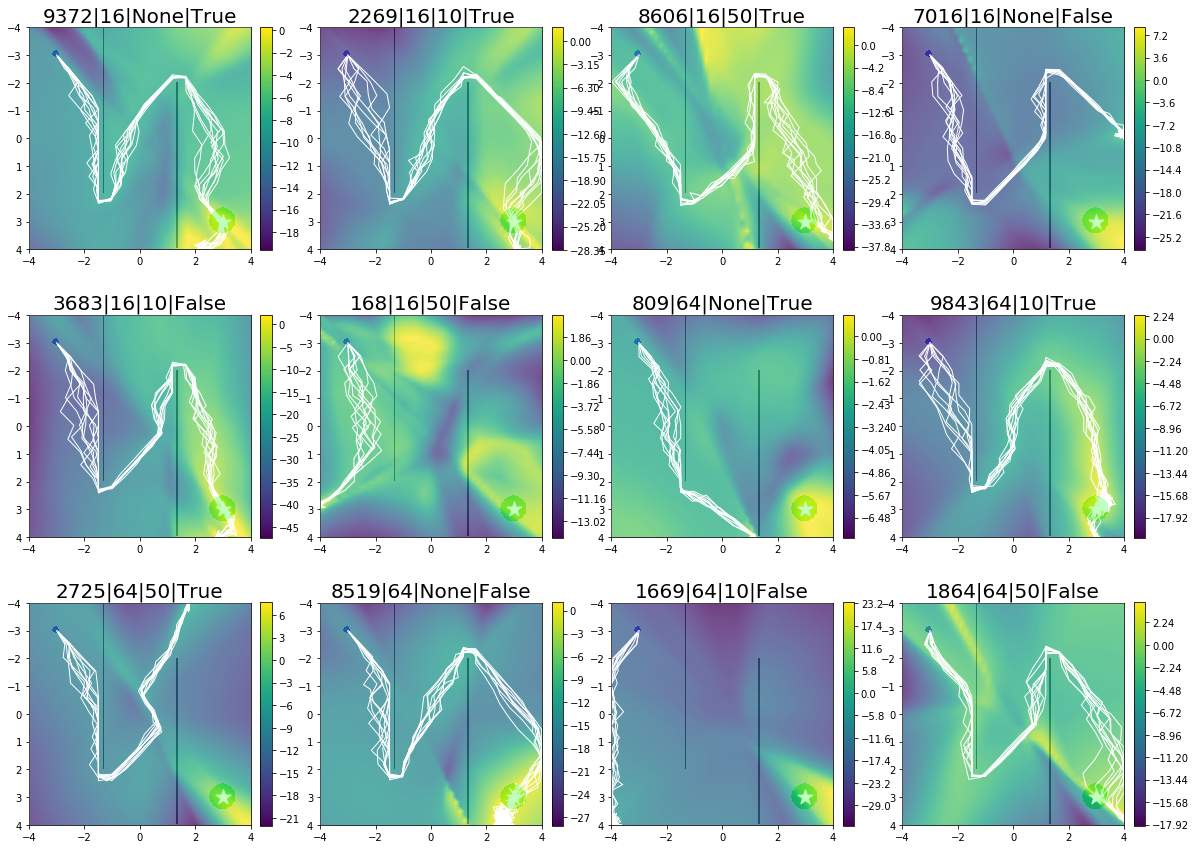

In [6]:
checkpoint_num = 500

checkpoints = []

for i, seed in enumerate(seeds):
    checkpoint_dir = os.path.join(seed, f'checkpoint_{checkpoint_num}')
    try:
        with open(os.path.join(seed, f'{checkpoint_dir}/checkpoint.pkl'), 'rb') as f:
            checkpoint = pickle.load(f)
            checkpoints.append((checkpoint, checkpoint_dir))
    except:
        pass
print(f"Loaded {len(checkpoints)} seeds")

n_plots = len(checkpoints)
n_columns = int(np.sqrt(n_plots) + 1)
n_rows = np.ceil(n_plots / n_columns)
plt.figure(figsize=(5 * n_columns, 5 * n_rows))
print(n_rows, n_columns)

for i, (checkpoint, checkpoint_dir) in enumerate(checkpoints):
    reward_clf = checkpoint['reward_classifier']
    train_env = checkpoint['training_environment']
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

    n_bins = train_env.n_bins + 1

    for j in range(n_bins):
        for k in range(n_bins):
            obs = np.eye(n_bins)[np.array([j, k])].flatten()

    n_samples = 50
    grid_vals, xys = get_grid_vals(train_env, n_samples)

    rewards = reward_clf.predict(grid_vals)

    plt.subplot(n_rows, n_columns, i+1, aspect=1)
    plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

    plt.gca().invert_yaxis()
    plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=300)
    plt.colorbar(fraction=0.046, pad=0.04)
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']
    plt.scatter(*target_pos, marker='*', s=250, color='white')

    plot_trajectories(checkpoint, checkpoint_dir)

    with open(os.path.join('/'.join(checkpoint_dir.split('/')[:-1]), 'params.json')) as f:
        params = json.load(f)
        n = params['algorithm_params']['kwargs']['train_distance_fn_every_n_steps']
        clip = params['algorithm_params']['kwargs']['ddl_clip_length']
        norm = params['algorithm_params']['kwargs']['normalize_distance_targets']
    plt.title(f'{checkpoint_dir.split("/")[-2].split("=")[-1].split("_")[0]}|{n}|{clip}|{norm}', fontsize=20)


In [32]:
checkpoints = {}

max_checkpoint = 500

for checkpoint_num in range(25, max_checkpoint+1, 25):
    checkpoint_seeds = {}
    for i, seed in enumerate(seeds):
        checkpoint_dir = os.path.join(seed, f'checkpoint_{checkpoint_num}')
        try:
            with open(os.path.join(seed, f'{checkpoint_dir}/checkpoint.pkl'), 'rb') as f:
                checkpoint = pickle.load(f)
                with open(os.path.join(seed, "params.json"), 'rb') as f:
                    params = json.load(f)
                    erc = params['algorithm_params']['kwargs']['ext_reward_coeff']
                    gamma = params['algorithm_params']['kwargs']['normalize_ext_reward_gamma']
                    ckpt_params = {"erc": erc, "gamma": gamma}
                
                checkpoint_seeds[seed] = (checkpoint, checkpoint_dir, ckpt_params)
        except:
            pass
    checkpoints[checkpoint_num] = checkpoint_seeds
    
valid_seeds = [seed for seed in checkpoints[max_checkpoint]]
for c_num in checkpoints:
    checkpoints[c_num] = {key: val for key, val in checkpoints[c_num].items() if key in valid_seeds}
    
print(f"Analyzing {len(checkpoints[25])} seeds")

n_plots = len(next(iter(checkpoints.values())))
n_columns = int(np.sqrt(n_plots) + 1)
n_rows = np.ceil(n_plots / n_columns)
print(n_rows, n_columns)

imgs = []

for checkpoint_num, checkpoint_seeds in checkpoints.items():
    fig = plt.figure(figsize=(5 * n_columns, 5 * n_rows))
    fig.suptitle(f"Checkpoint {checkpoint_num}", fontsize=16)
    
#     s = '/home/kevinli/ray_results/gym/Point2D/Maze-v0/2020-06-11T23-17-15-vice_reproduce_justins/5cc51f66-algorithm=VICE-seed=6956_2020-06-11_23-17-16rdjife9s'
#     print(checkpoint_seeds[s])
#     print(checkpoint_seeds[s][2])
#     print(checkpoint_seeds[s][2]['erc'])
    for i, (checkpoint, checkpoint_dir, params) in enumerate(sorted(checkpoint_seeds.values(), key=lambda c: c[2]['erc'])):
        reward_clf = checkpoint['reward_classifier']
        train_env = checkpoint['training_environment']
        target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

        n_bins = train_env.n_bins + 1

        for j in range(n_bins):
            for k in range(n_bins):
                obs = np.eye(n_bins)[np.array([j, k])].flatten()

        n_samples = 50
        grid_vals, xys = get_grid_vals(train_env, n_samples)

        rewards = reward_clf.predict(grid_vals)

        plt.subplot(n_rows, n_columns, i+1, aspect=1)
        plt.imshow(train_env.render('rgb_array', width=256, height=256),
               extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

        plt.gca().invert_yaxis()
        plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=300)
        plt.colorbar(fraction=0.046, pad=0.04)
        target_pos = train_env.unwrapped._get_obs()['state_desired_goal']
        plt.scatter(*target_pos, marker='*', s=250, color='white')

        plot_trajectories(checkpoint, checkpoint_dir)
        
        erc, gamma = params['erc'], params['gamma']
        plt.title(f'{checkpoint_dir.split("/")[-2].split("=")[-1].split("_")[0]}, {erc}, {gamma}', fontsize=20)
        
    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    imgs.append(data)
    
import imageio
imageio.mimsave('./all_seeds_all_checkpoints.gif', imgs, duration=1.0)


W0612 13:06:30.768500 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:30.843252 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:31.060968 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:31.122712 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:31.435389 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:31.508731 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:31.728772 140616931542848 hdf5_format.py:171] No training 

W0612 13:06:38.910752 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:39.126292 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:39.194712 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:39.370663 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:39.472398 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:39.796875 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:39.868055 140616931542848 hdf5_format.py:171] No training 

W0612 13:06:47.276426 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:47.371384 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:47.571675 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:47.656914 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:47.879988 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:48.040130 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:48.276617 140616931542848 hdf5_format.py:171] No training 

W0612 13:06:55.766741 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:55.979348 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:56.052425 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:56.279951 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:56.362127 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:56.644896 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:06:56.720880 140616931542848 hdf5_format.py:171] No training 

W0612 13:07:04.014831 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:04.092297 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:04.307007 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:04.397001 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:04.608618 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:04.704102 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:04.912443 140616931542848 hdf5_format.py:171] No training 

W0612 13:07:13.006124 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:13.115467 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:13.415352 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:13.479351 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:13.720432 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:13.819922 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:14.057340 140616931542848 hdf5_format.py:171] No training 

W0612 13:07:22.386670 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:22.633745 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:22.707376 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:22.919039 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:23.018544 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:23.273403 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:23.363177 140616931542848 hdf5_format.py:171] No training 

W0612 13:07:31.575788 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:31.662858 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:31.856166 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:31.929404 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:32.213174 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:32.334081 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:32.530524 140616931542848 hdf5_format.py:171] No training 

W0612 13:07:40.439259 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:40.655284 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:40.728601 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:40.969658 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:41.092115 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:41.296113 140616931542848 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0612 13:07:41.400393 140616931542848 hdf5_format.py:171] No training 

Analyzing 12 seeds
3.0 4


/home/kevinli/anaconda3/envs/softlearning/lib/python3.7/site-packages/ipykernel_launcher.py:76: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe3eb362e18> (for post_execute):


KeyboardInterrupt: 

In [28]:
sorted(checkpoint_seeds.values(), key=lambda seed: print(seed) or checkpoint_seeds[seed][2]['erc'])

({'variant': {'git_sha': '875b8f44794dcf0f1eed790a1ae7e6f5ec9d59c1 master', 'num_goals': 2, 'environment_params': {'training': {'domain': 'Point2D', 'task': 'Maze-v0', 'universe': 'gym', 'kwargs': {'action_scale': 0.5, 'images_are_rgb': True, 'reward_type': 'none', 'use_count_reward': True, 'n_bins': 50, 'wall_shape': 'medium-maze', 'init_pos_range': ((-3, -3), (-3, -3)), 'target_pos_range': ((3, 3), (3, 3)), 'render_onscreen': False, 'observation_keys': ('state_observation',)}}, 'evaluation': {'domain': 'Point2D', 'task': 'Maze-v0', 'universe': 'gym', 'kwargs': {'action_scale': 0.5, 'images_are_rgb': True, 'reward_type': 'none', 'use_count_reward': True, 'n_bins': 50, 'wall_shape': 'medium-maze', 'init_pos_range': ((-3, -3), (-3, -3)), 'target_pos_range': ((3, 3), (3, 3)), 'render_onscreen': False, 'observation_keys': ('state_observation',)}}}, 'policy_params': {'type': 'GaussianPolicy', 'kwargs': {'hidden_layer_sizes': (256, 256), 'squash': True, 'observation_keys': None, 'observatio

TypeError: unhashable type: 'dict'

## Analyze a single seed in detail

In [57]:
base_path = os.path.join(common_dir, universe, domain, task)
exps = sorted(list(glob.iglob(os.path.join(base_path, '*'))))
for i, exp in enumerate(exps):
    print(f'{i} \t {exp.replace(base_path, "")}')
    
exp_choice = int(input('\n Which experiment do you want to analyze? (ENTER A NUMBER) \t'))

exp_path = exps[exp_choice]
print('\n')
seeds = sorted(list(glob.iglob(os.path.join(exp_path, '*'))))
seeds = [seed for seed in seeds if os.path.isdir(seed)]
for i, seed in enumerate(seeds):
    print(f'{i} \t {seed.replace(exp_path, "")}')
    
# TODO: Extend to analyzing all seeds
seed_choice = int(input('\n Which seed do you want to analyze? (ENTER A NUMBER) \t'))

seed_path = seeds[seed_choice]

print('PATH:\n', seed_path)

0 	 /2020-05-27T16-46-37-ddl_maze
1 	 /2020-05-27T18-08-07-ddl_maze_count
2 	 /2020-05-28T03-25-55-vice_test
3 	 /2020-05-28T03-28-00-vice_test
4 	 /2020-05-28T03-31-57-vice_test
5 	 /2020-05-28T03-33-32-vice_test
6 	 /2020-05-28T03-44-54-vice_test
7 	 /2020-05-28T15-34-01-dynamics_aware_vice
8 	 /2020-05-29T03-42-04-dynamics_aware_vice_shorter_paths
9 	 /2020-05-29T03-47-53-vice_only
10 	 /2020-05-29T16-15-18-vice_only_final
11 	 /2020-05-31T05-25-18-vice_gt_embedding
12 	 /2020-06-02T02-47-31-vice_gt_embedding_rerun
13 	 /2020-06-02T03-22-25-vice_gt_embedding_more_reg
14 	 /2020-06-02T10-48-03-vice_gt_embedding_again
15 	 /2020-06-03T00-23-13-high_reg_vice
16 	 /2020-06-03T06-19-35-vice_dropout_and_wd
17 	 /2020-06-04T16-33-57-vice_gt_pairwise_embedding
18 	 /2020-06-05T00-51-54-vice_gt_pairwise_embedding_rerun
19 	 /2020-06-05T00-52-40-vice_gt_pairwise_embedding_rerun
20 	 /2020-06-05T01-03-06-vice_gt_pairwise_embedding_rerun_real
21 	 /2020-06-05T11-52-19-vice_gt_pairwise_embedding

In [58]:
import json

# Print hyperparameters

with open(os.path.join(seed_path, 'params.json'), 'rb') as f:
    params = json.load(f)

# print(json.dumps(params, indent=4))
hyperparams = {
    'use_count_reward': params['environment_params']['training']['kwargs']['use_count_reward'],
#     'positive_on_first_occurrence': params['algorithm_params']['kwargs']['positive_on_first_occurence'],
#     'discount_factor': params['algorithm_params']['kwargs']['normalize_ext_reward_gamma'],
    'weight_decay': params['reward_classifier_params']['kwargs']['kernel_regularizer_lambda'],
}
for name, value in hyperparams.items():
    print(f"{name}: {value}")

use_count_reward: True
weight_decay: None


## Specify the Checkpoint

In [59]:
checkpoint_to_analyze = 500
checkpoint_dir = os.path.join(seed_path, f'checkpoint_{checkpoint_to_analyze}')

In [60]:
with open(os.path.join(seed_path, f'{checkpoint_dir}/checkpoint.pkl'), 'rb') as f:
    checkpoint = pickle.load(f)

W0611 11:59:38.467499 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 11:59:38.529454 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


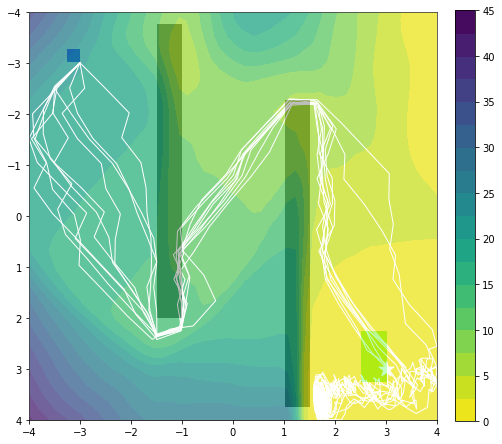

In [64]:
target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

distance_fn = checkpoint['distance_estimator']
grid_vals, (xs, ys) = get_grid_vals(train_env, 50)
goal_vals = np.array(target_pos[None]).repeat(len(grid_vals), axis=0)
distances = np.sum((distance_fn(grid_vals) - distance_fn(goal_vals)) ** 2, axis=-1)

plt.figure(figsize=(8, 8))
plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)
plt.gca().invert_yaxis()
plt.contourf(xs, ys, distances.reshape(xs.shape), cmap='viridis_r', levels=20)
plt.colorbar(fraction=0.046, pad=0.04)
plt.scatter(*target_pos, marker='*', s=250, color='white')
plot_trajectories(checkpoint, checkpoint_dir)

## Load Reward Classifier

In [65]:
print(checkpoint.keys())

dict_keys(['variant', 'training_environment', 'evaluation_environment', 'algorithm', 'policy_weights', 'rnd_networks', 'reward_classifier', 'distance_estimator'])


In [66]:
reward_clf = checkpoint['reward_classifier']

In [67]:
train_env = checkpoint['training_environment']

In [68]:
target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

In [69]:
n_bins = train_env.n_bins + 1

for i in range(n_bins):
    for j in range(n_bins):
        obs = np.eye(n_bins)[np.array([i, j])].flatten()

In [70]:
n_samples = 50
obs_space = train_env.unwrapped.observation_space['state_observation']
xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

xys = np.meshgrid(xs, ys)

In [71]:
grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))
# grid_vals = np.array([np.eye(n_bins)[train_env.unwrapped._discretize_observation(grid_val)].flatten() for grid_val in grid_vals])

In [72]:
grid_vals.shape

(2500, 2)

In [73]:
rewards = reward_clf.predict(grid_vals)

In [74]:
reward_clf.summary()

Model: "picklable_model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
state_observation (InputLaye [(None, 2)]               0         
_________________________________________________________________
embedding_fn (PicklableModel (None, 2)                 67074     
_________________________________________________________________
feedforward_reward_classifie (None, 1)                 66817     
Total params: 133,891
Trainable params: 133,891
Non-trainable params: 0
_________________________________________________________________


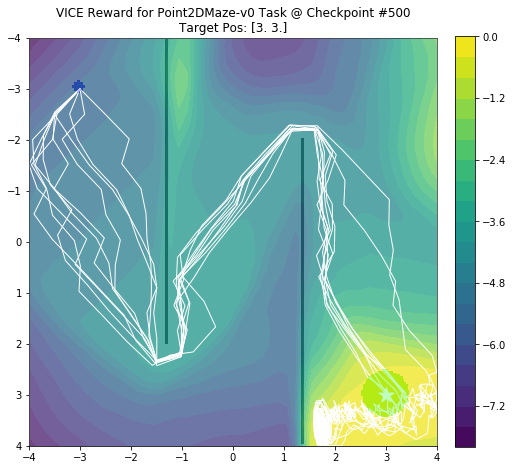

In [75]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle

plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

plt.gca().invert_yaxis()
plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=20)
plt.colorbar(fraction=0.046, pad=0.04)
plot_trajectories(checkpoint, checkpoint_dir)

# print(type(train_env._env.unwrapped))
# print(dir(train_env._env.unwrapped))
# print(train_env._medium_maze_manhattan_distance(xys))

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'VICE Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

In [76]:
def _maze_distance(self, obs):
    achieved_goals = obs['state_achieved_goal']
    desired_goals = obs['state_desired_goal']

    d = np.zeros(len(achieved_goals))
    left_wall_x = -self.boundary_dist/3
    left_wall_bottom = self.inner_wall_max_dist
    right_wall_x = self.boundary_dist/3
    right_wall_top = -self.inner_wall_max_dist
    
    positions = achieved_goals.copy()
    xs = positions[:,0]
    ys = positions[:,1]
    
    # Left section
    d += (xs < left_wall_x) * np.clip(left_wall_bottom - ys, 0, None)
    ys[xs < left_wall_x] = left_wall_bottom
    
    # Middle section
    d += (xs < right_wall_x) * np.clip(ys - right_wall_top, 0, None)
    ys[xs < right_wall_x] = right_wall_top
    
    # Right section
    d += np.abs(ys - desired_goals[:,1])
    
    # Horizontal movement
    d += np.abs(xs - desired_goals[:,0])
    
    return d

def _direct_distance(self, obs):
    achieved_goals = obs['state_achieved_goal']
    desired_goals = obs['state_desired_goal']

    d = np.zeros(len(achieved_goals))
    left_wall_x = -self.boundary_dist/3
    left_wall_bottom = self.inner_wall_max_dist
    right_wall_x = self.boundary_dist/3
    right_wall_top = -self.inner_wall_max_dist
    
    positions = achieved_goals.copy()
    xs = positions[:,0]
    ys = positions[:,1]
    
    # Left section
    left_mask = xs < left_wall_x
    d += left_mask * np.linalg.norm(positions - np.array([left_wall_x, left_wall_bottom]), axis=-1)
    xs[left_mask] = left_wall_x
    ys[left_mask] = left_wall_bottom
    
    # Middle section
    middle_mask = np.logical_and(left_wall_x <= xs, xs < right_wall_x)
    d += middle_mask * np.linalg.norm(positions - np.array([right_wall_x, right_wall_top]), axis=-1)
    xs[middle_mask] = right_wall_x
    ys[middle_mask] = right_wall_top
    
    # Right section
    d += np.linalg.norm(positions - desired_goals, axis=-1)
    
    return d
    
    
    
def _medium_maze_manhattan_distance(self, obs):
    achieved_goals = obs['state_achieved_goal']
    desired_goals = obs['state_desired_goal']

    d = 0
    left_wall_x = -self.boundary_dist/3
    left_wall_bottom = self.inner_wall_max_dist
    right_wall_x = self.boundary_dist/3
    right_wall_top = -self.inner_wall_max_dist
    
    positions = achieved_goals.copy()
    xs = positions[:,0]
    ys = positions[:,1]

    # Left section
    left_mask = xs < left_wall_x
    right_dist = left_wall_x - xs
    down_dist = np.clip(left_wall_bottom - ys, 0, None)
    d += left_mask * (right_dist + down_dist)
    xs[left_mask] = left_wall_x
    ys[left_mask] = left_wall_bottom
    
    # Middle section
    right_mask = left_wall_x <= xs and xs < right_wall_x
    right_dist = right_wall_x - xs
    up_dist = np.clip(ys - right_wall_top, 0, None)
    d += right_mask * (right_dist + up_dist)
    xs[right_mask] = right_wall_x
    ys[right_mask] = right_wall_top

    # Right section
    horizontal_dist = np.abs(xs - desired_goals[:,0])
    vertical_dist = np.abs(ys - desired_goals[:,1])
    d += horizontal_dist + vertical_dist

    return d

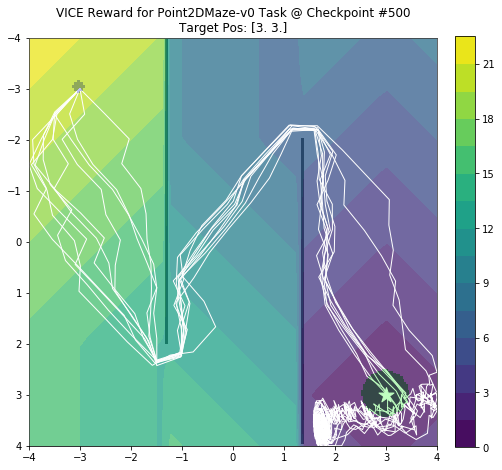

In [77]:
grid_vals, xys = get_grid_vals(train_env, 50)
goal_vals = np.repeat(target_pos[None], n_samples * n_samples, axis=0)

inputs = {
    'state_achieved_goal': grid_vals,
    'state_desired_goal': goal_vals
}

plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle

plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

plt.gca().invert_yaxis()
rewards = _maze_distance(train_env, inputs)

plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=20)
plt.colorbar(fraction=0.046, pad=0.04)
plot_trajectories(checkpoint, checkpoint_dir)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'VICE Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

## Plot All Checkpoints at Once

In [78]:
def plot_vice_reward(clf, train_env, n_samples=50):
    obs_space = train_env.observation_space['state_observation']
    xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
    ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

    xys = np.meshgrid(xs, ys)
    grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))
    
    rewards = clf.predict(grid_vals)
    plt.gca().invert_yaxis()
    plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=300)
    plt.colorbar(fraction=0.046, pad=0.04)
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

    if task == 'BoxWall-v1':
        currentAxis = plt.gca()
        currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                              alpha=1, fill=None, linewidth=4))

    plt.scatter(*target_pos, marker='*', s=250, color='white')

In [79]:
def plot_grid(imgs, labels=None):
    n_images = len(imgs)
    n_columns = np.sqrt(n_images)
    n_rows = np.ceil(n_images / n_columns) + 1
    plt.figure(figsize=(5 * n_columns, 5 * n_rows))
    for i, img in enumerate(imgs):
        plt.subplot(n_rows, n_columns, i+1)
        plt.axis('off')
        plt.imshow(img)
        if labels is not None:
            plt.title(labels[i], fontsize=20)
    plt.show()

In [80]:
checkpoint_paths = list(glob.iglob(os.path.join(seed_path, 'checkpoint_*')))
# Sort by the checkpoint number at the end
checkpoint_paths = sorted(checkpoint_paths, key=lambda s: int(s.split("_")[-1]))

W0611 12:02:29.927725 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:02:29.987507 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:02:30.852379 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:02:30.908464 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:02:31.485531 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:02:31.540556 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:02:32.152153 140309443716928 hdf5_format.py:171] No training 

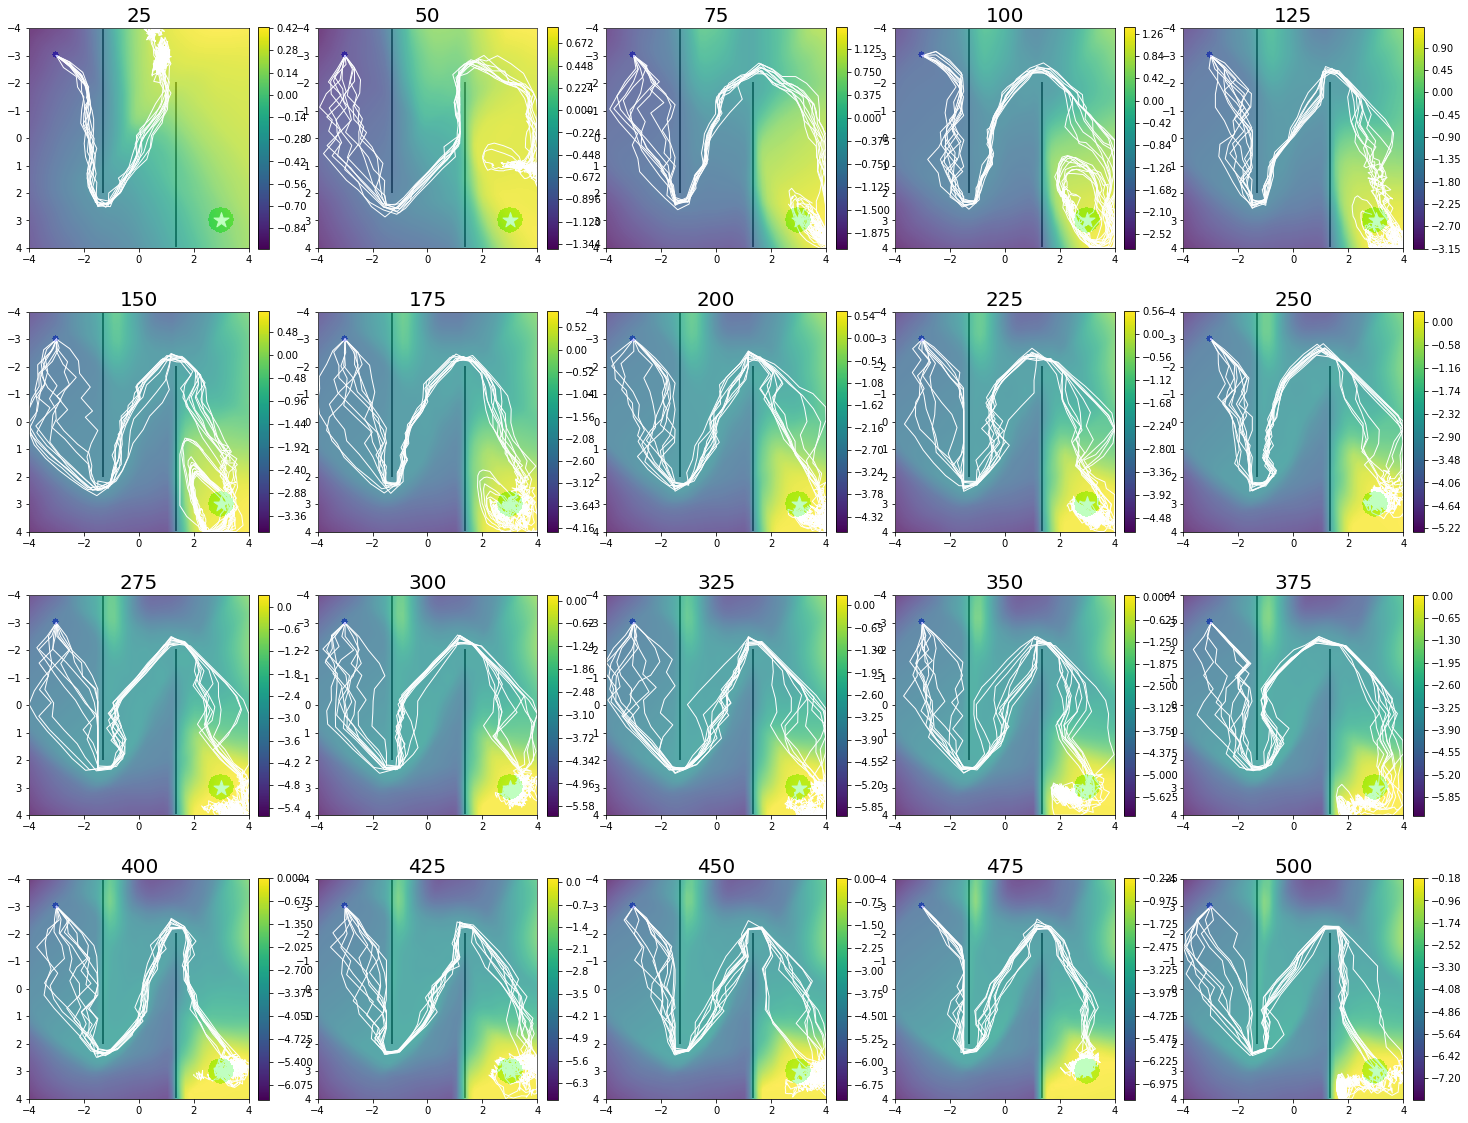

In [81]:
n_plots = len(checkpoint_paths)
n_columns = int(np.sqrt(n_plots) + 1)
n_rows = np.ceil(n_plots / n_columns)
plt.figure(figsize=(5 * n_columns, 5 * n_rows))

for i, path in enumerate(checkpoint_paths):
    with open(os.path.join(path, 'checkpoint.pkl'), 'rb') as f:
        checkpoint = pickle.load(f)
    reward_clf = checkpoint['reward_classifier']
    train_env = checkpoint['training_environment']
    plt.subplot(n_rows, n_columns, i+1, aspect=1)
    plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)
    plot_vice_reward(reward_clf, train_env)
    plot_trajectories(checkpoint, path)
    plt.title(int(path.split("_")[-1]), fontsize=20)
    
plt.show()

W0611 12:03:44.209737 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:03:44.268522 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
/home/kevinli/anaconda3/envs/softlearning/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
W0611 12:03:44.900758 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:03:44.969817 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0611 12:03:45.646332 140309443716928 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manua

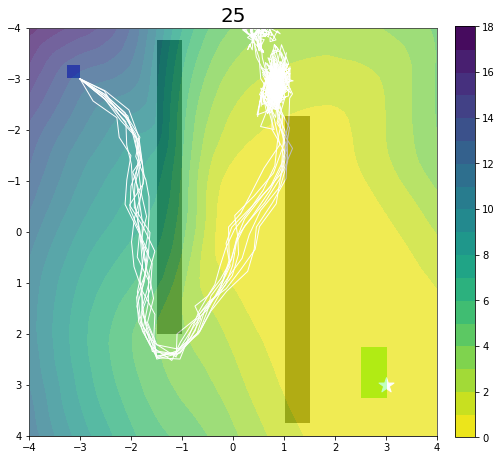

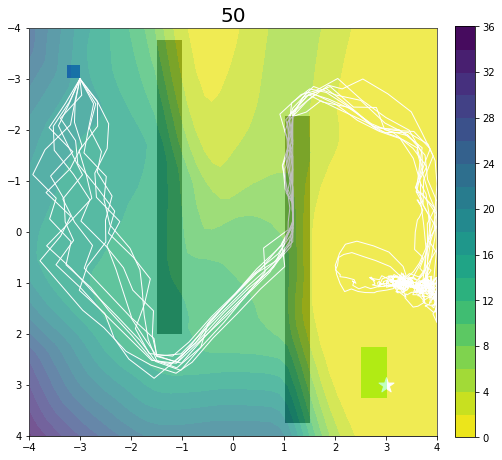

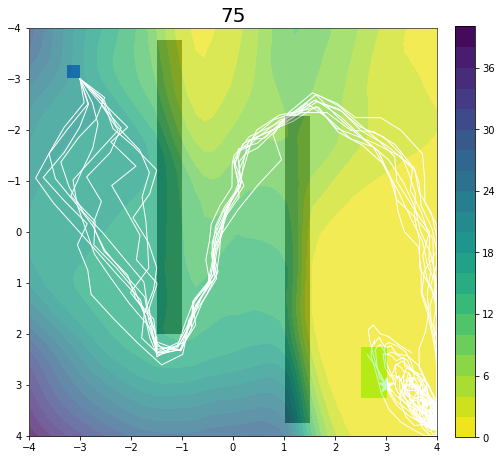

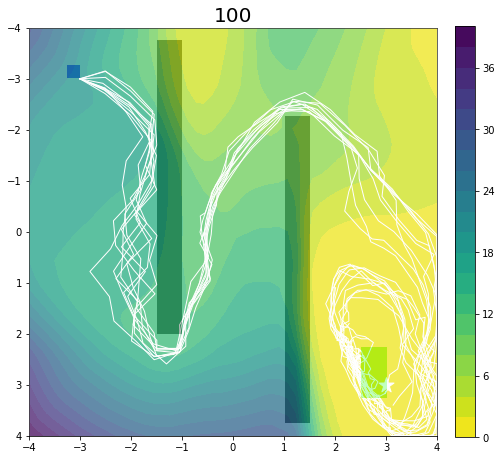

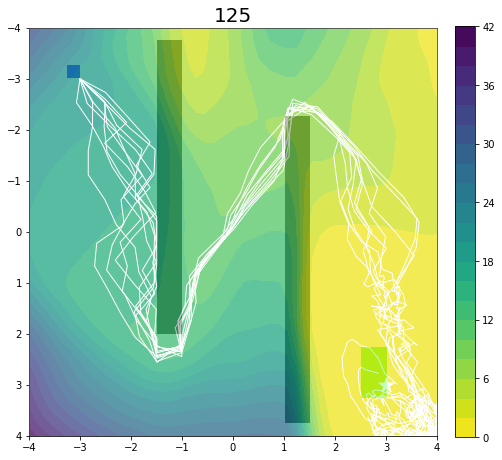

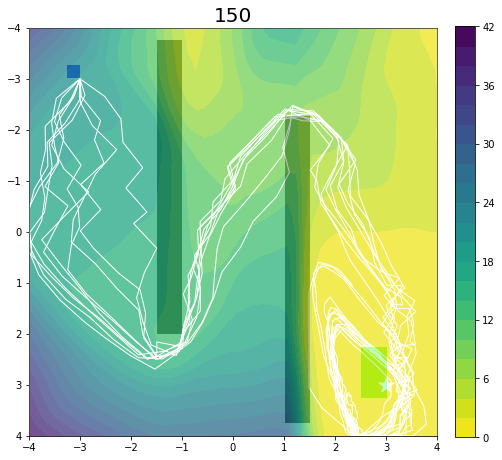

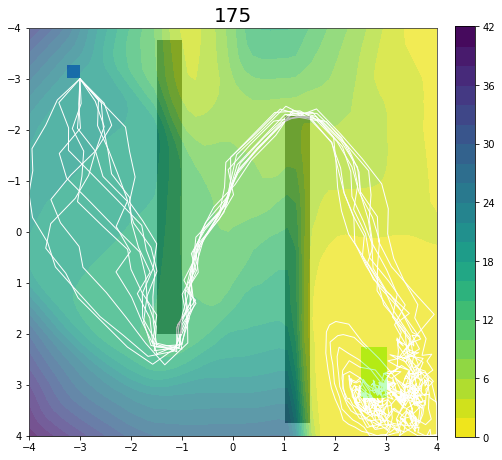

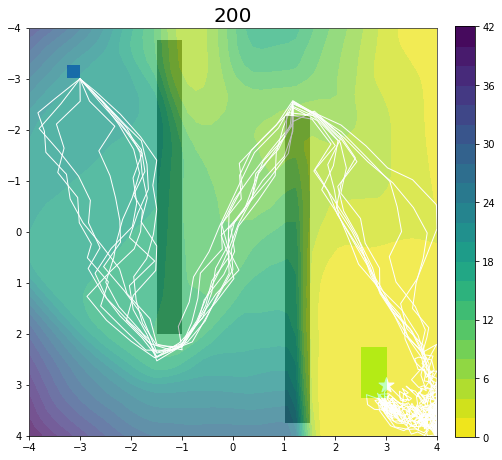

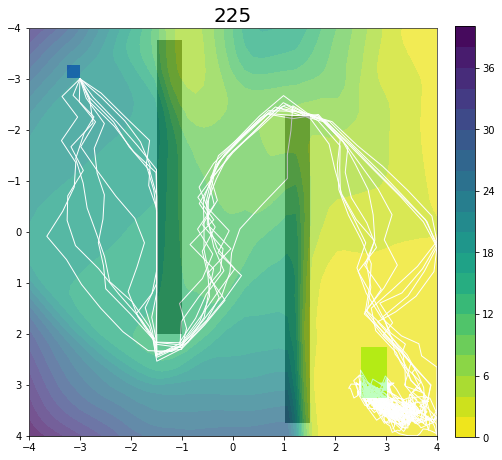

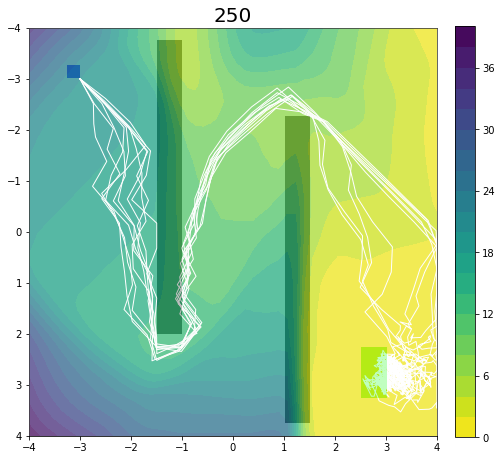

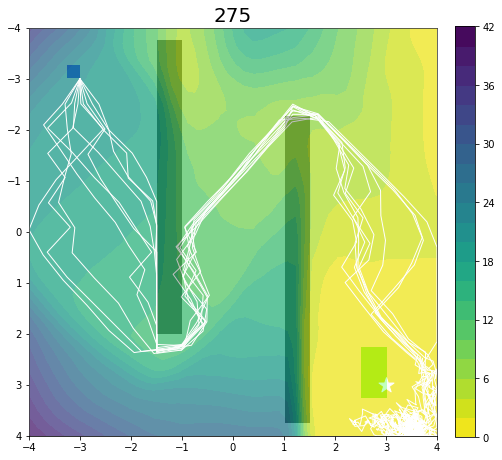

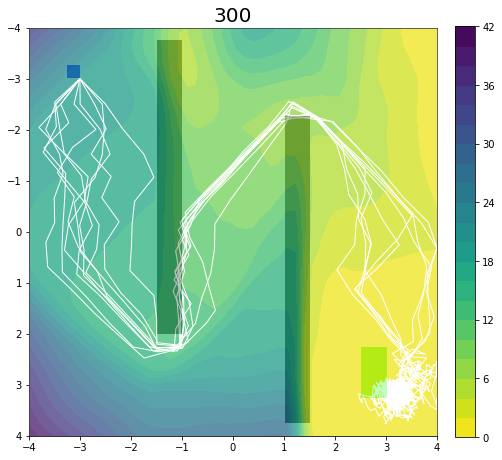

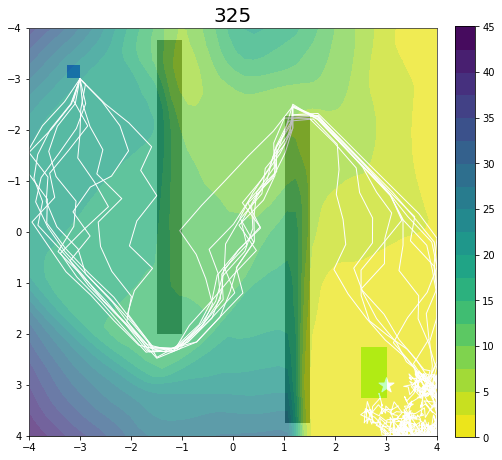

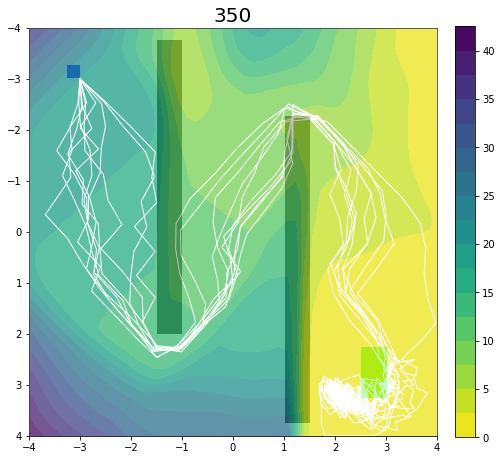

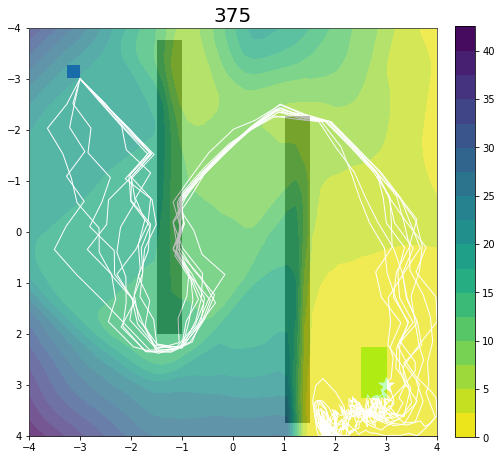

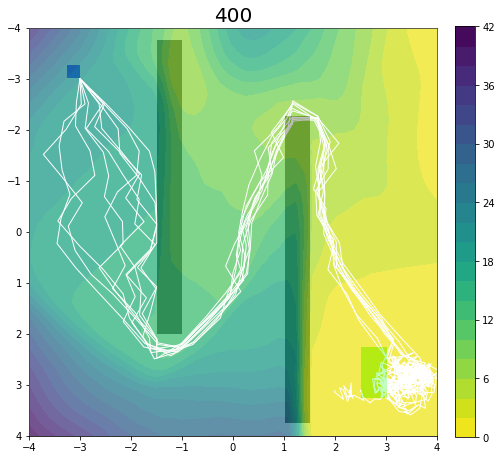

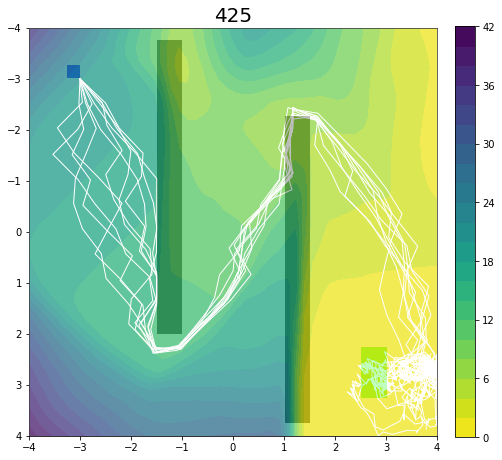

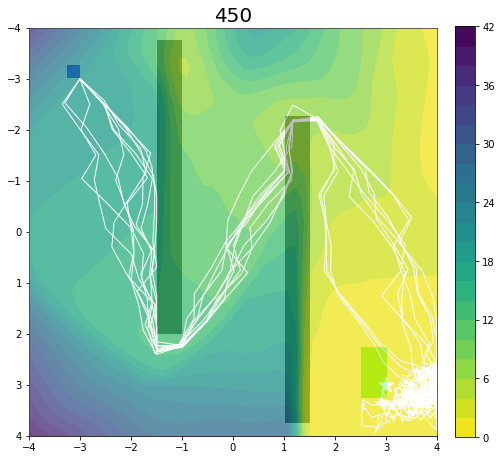

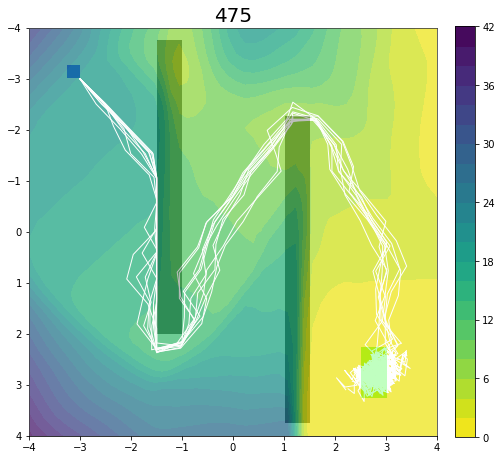

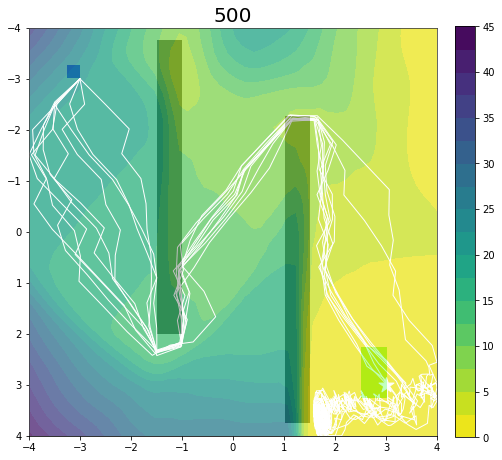

In [82]:
def plot_distance_to_goal(distance_fn, train_env, n_samples=50):
    grid_vals, xys = get_grid_vals(train_env, n_samples)
    dists = np.sum((distance_fn.predict(grid_vals) - distance_fn.predict(goal_vals)) ** 2, axis=-1)
    
#     plt.figure(figsize=(8, 8))
    from matplotlib.patches import Rectangle

    plt.imshow(train_env.render('rgb_array', width=32, height=32),
               extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

    plt.gca().invert_yaxis()
    plt.contourf(xys[0], xys[1], dists.reshape(xys[0].shape), cmap='viridis_r', levels=20, zorder=1)
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.scatter(*target_pos, marker='*', s=250, color='white', zorder=2)

checkpoint_paths = list(glob.iglob(os.path.join(seed_path, 'checkpoint_*')))
# Sort by the checkpoint number at the end
checkpoint_paths = sorted(checkpoint_paths, key=lambda s: int(s.split("_")[-1]))

imgs = []
for i, path in enumerate(checkpoint_paths):
    fig = plt.figure(figsize=(8, 8))
    with open(os.path.join(path, 'checkpoint.pkl'), 'rb') as f:
        checkpoint = pickle.load(f)
    distance_fn = checkpoint['distance_estimator']
    train_env = checkpoint['training_environment']
    plot_distance_to_goal(distance_fn, train_env)
    plt.title(int(path.split("_")[-1]), fontsize=20)
    plot_trajectories(checkpoint, path)
    fig.canvas.draw()
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    imgs.append(data)
    
import imageio
imageio.mimsave('./test.gif', imgs, duration=1.0)

## Plot Visitations

In [516]:
from softlearning.replay_pools.utils import get_replay_pool_from_variant

replay_pool = None
train_env = None

for i, path in enumerate(checkpoint_paths):
    if replay_pool is None:
        with open(os.path.join(path, 'checkpoint.pkl'), 'rb') as f:
            checkpoint = pickle.load(f)
        variant = checkpoint['variant']
        train_env = checkpoint['training_environment']
        replay_pool = get_replay_pool_from_variant(variant, train_env)
        
    replay_pool_path = os.path.join(path, 'replay_pool.pkl')
    replay_pool.load_experience(replay_pool_path)

W0601 00:35:48.603959 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [517]:
non_zero_rows = replay_pool.data[('observations', 'state_observation')].any(axis=-1)

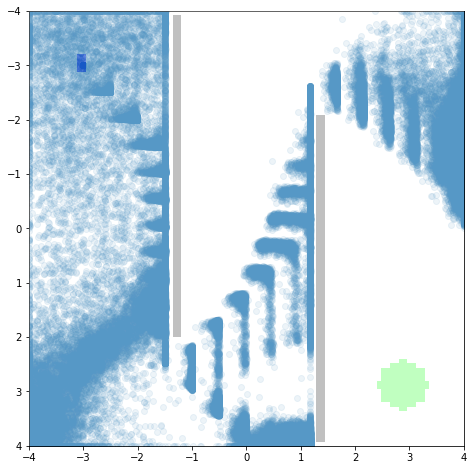

In [518]:
visitations = replay_pool.data[('observations', 'state_observation')][non_zero_rows]
plt.figure(figsize=(8, 8))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().invert_yaxis()
plt.imshow(train_env.render('rgb_array'),
           extent=(-4, 4, -4, 4),
           origin='lower',
           alpha=0.25,
           zorder=3,
           interpolation='nearest')

plt.scatter(visitations[:, 0], visitations[:, 1], alpha=0.1)

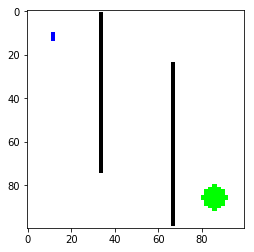

In [519]:
plt.imshow(train_env.render('rgb_array'))

## Plot Goal Examples

In [ ]:
with open('/home/justinvyu/dev/vice/goal_classifier/pointmass_nowalls/bottom_middle/positives.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(data['state_observation'][:,0], data['state_observation'][:,1], s=5)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.gca().invert_yaxis()

## Plot Embedding Distances

In [28]:
embedding_fn = checkpoint['distance_estimator']
train_env = checkpoint['training_environment']
target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

n_samples = 50
grid_vals = get_grid_vals(train_env, n_samples)
goal_vals = np.repeat(target_pos[None], n_samples * n_samples, axis=0)
dists = np.linalg.norm(embedding_fn.predict(goal_vals) - embedding_fn.predict(grid_vals), axis=-1)

KeyError: 'distance_estimator'

In [ ]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle

plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

plt.gca().invert_yaxis()
plt.contourf(xys[0], xys[1], dists.reshape(xys[0].shape), levels=300, zorder=1)
plt.colorbar(fraction=0.046, pad=0.04)

plot_trajectories(checkpoint, path)
    
plt.scatter(*target_pos, marker='*', s=250, color='white', zorder=2)

plt.title(f'|phi(g) - phi(s)| for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

## Plot Ground Truth Rewards

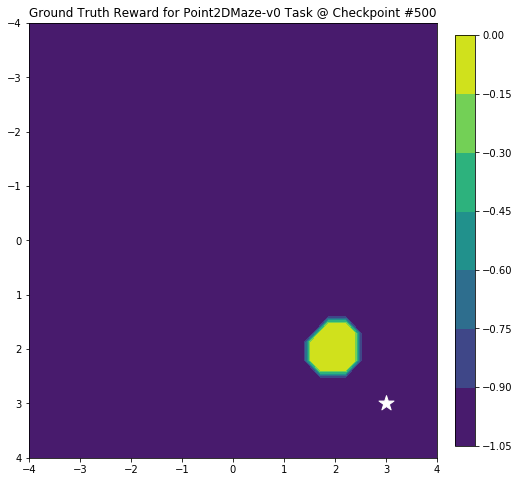

In [287]:
feed_dict = {
    'state_achieved_goal': grid_vals,
    'state_desired_goal': np.full(grid_vals.shape, fill_value=2)
}
train_env.unwrapped.reward_type = 'sparse'
gtr = train_env.unwrapped.compute_rewards(None, feed_dict)
plt.figure(figsize=(8, 8))

from matplotlib.patches import Rectangle

plt.gca().invert_yaxis()

plt.contourf(xys[0], xys[1], gtr.reshape(xys[0].shape))
plt.colorbar(fraction=0.046, pad=0.04)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.title(f'Ground Truth Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}')

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.show()

## Qs Visualization

In [529]:
checkpoint_to_analyze = 500
checkpoint_dir = os.path.join(seed_path, f'checkpoint_{checkpoint_to_analyze}')

with open(os.path.join(checkpoint_dir, 'checkpoint.pkl'), 'rb') as f:
    checkpoint = pickle.load(f)

W0601 00:36:48.829327 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [530]:
variant = checkpoint['variant']
env = checkpoint['training_environment']
target_pos = env.unwrapped._get_obs()['state_desired_goal']

In [531]:
from softlearning.value_functions.utils import get_Q_function_from_variant

In [532]:
Qs = get_Q_function_from_variant(variant, env)

In [533]:
for i, Q in enumerate(Qs):
    weights_path = os.path.join(checkpoint_dir, f'Qs_{i}')
    Q.load_weights(weights_path)

In [534]:
n_action_samples = 20
sample_actions = np.vstack([env.action_space.sample() for _ in range(n_action_samples)])

In [535]:
n_samples = 50

obs_space = env.observation_space['state_observation']
xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

xys = np.meshgrid(xs, ys)
grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))

In [536]:
value_estimates = []
for pos in grid_vals:
    value_estimates.append(
        np.min([Q.predict([sample_actions,
                        np.repeat(pos, n_action_samples).reshape((n_action_samples, -1))])
             for Q in Qs])
    )

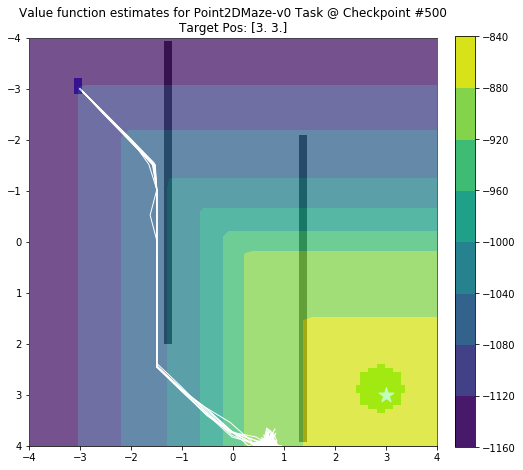

In [537]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle
# plt.gca().invert_yaxis()

plt.imshow(train_env.render('rgb_array', width=32, height=32),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)
plt.gca().invert_yaxis()
plt.contourf(xys[0], xys[1], np.array(value_estimates).reshape(xys[0].shape))
plt.colorbar(fraction=0.046, pad=0.04)

plot_trajectories(checkpoint, checkpoint_dir)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'Value function estimates for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

In [466]:
np.repeat(grid_vals[0], n_action_samples).reshape((n_action_samples, -1))

array([[-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.]])